# 05 — Global Financial Spillovers

## Economic Question
Do global financial conditions influence euro-area retail activity?

## Motivation
Euro-area economies are:
- Financially integrated
- Exposed to global interest rates
- Sensitive to US monetary policy and business cycles

Global shocks may affect:
- Consumer credit conditions
- Asset prices and wealth
- Confidence and spending decisions

## Objective of This Notebook
1. Examine US financial indicators
2. Assess their relationship with euro-area retail growth
3. Identify spillover channels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 4)

In [2]:
df = pd.read_csv("../data/processed/macro_panel.csv")

df["month_dt"] = pd.to_datetime(df["month"])
df = df.sort_values(["country", "month_dt"]).reset_index(drop=True)

df.head()

,country,month,rti_index,hicp_index,hfce,cci,us_cpi,us_unemployment,us_fed_funds,us_industrial_prod,month_dt
0,AT,2010-01,99.5,108.12,NaN,-4.9,217.488,9.8,0.11,89.3426,2010-01-01
1,AT,2010-02,100.7,108.34,NaN,-4.6,217.281,9.8,0.13,89.6779,2010-02-01
2,AT,2010-03,100.7,109.46,NaN,-8.6,217.353,9.9,0.16,90.2928,2010-03-01
3,AT,2010-04,99.9,109.69,NaN,-5.8,217.403,9.9,0.20,90.5991,2010-04-01
4,AT,2010-05,99.4,109.63,NaN,-9.9,217.290,9.6,0.20,91.8230,2010-05-01


In [3]:
df["rti_growth"] = (
    df.groupby("country")["rti_index"]
      .pct_change() * 100
)

## Global Financial Indicators (FRED)

We use four US-based indicators:
- **CPI** — global inflation proxy
- **Unemployment rate** — business cycle conditions
- **Federal Funds Rate** — global monetary stance
- **Industrial production** — real economic momentum

These variables influence:
- Capital flows
- Interest rates
- Risk appetite

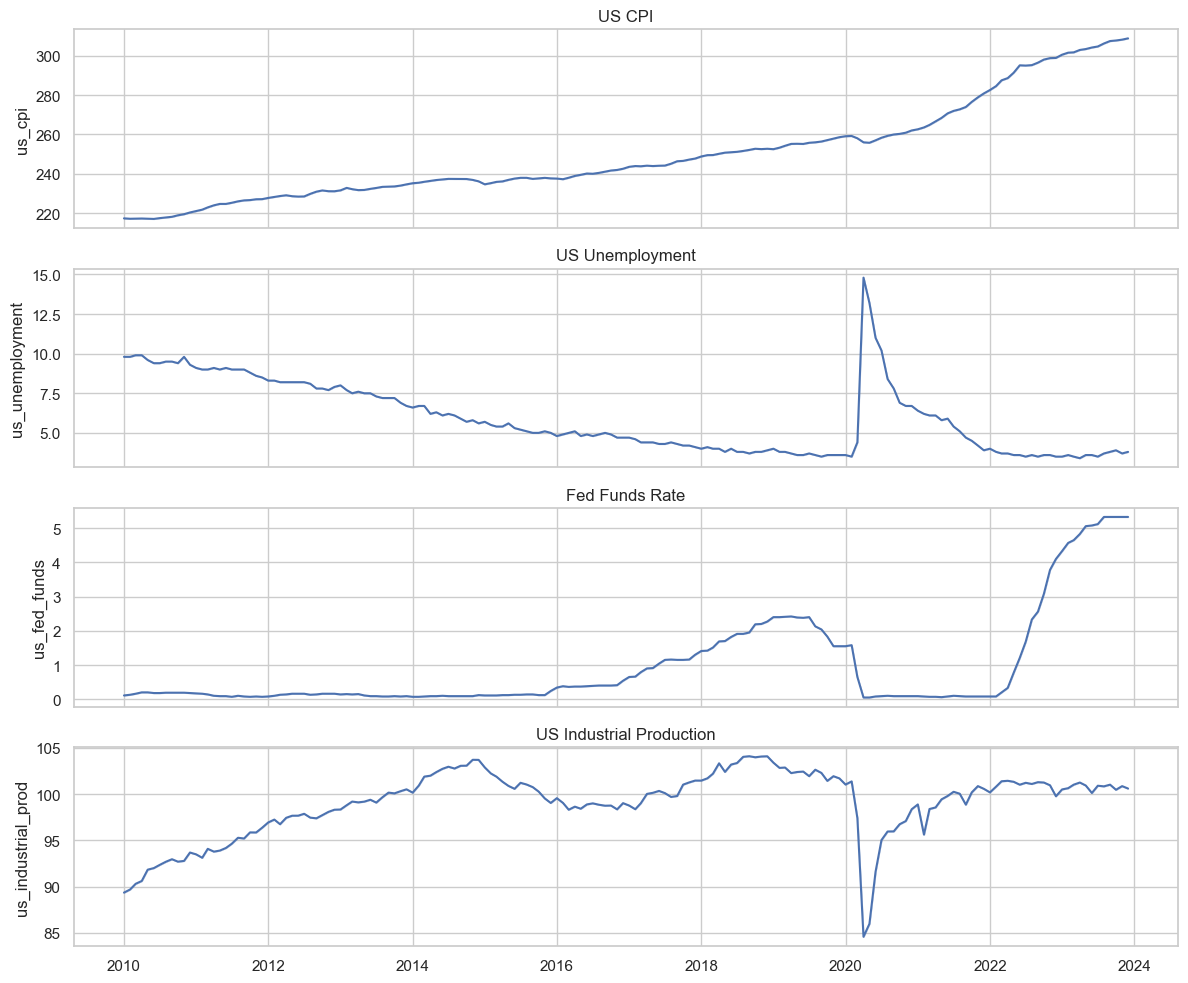

In [4]:
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

variables = [
    ("us_cpi", "US CPI"),
    ("us_unemployment", "US Unemployment"),
    ("us_fed_funds", "Fed Funds Rate"),
    ("us_industrial_prod", "US Industrial Production"),
]

for ax, (var, title) in zip(axes, variables):
    sns.lineplot(data=df, x="month_dt", y=var, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

## Observations

- Monetary tightening cycles are clearly visible
- Crisis periods align across indicators
- US conditions show strong cyclical structure

These global signals may transmit internationally.

In [5]:
ea7 = (
    df.groupby("month_dt")[["rti_growth"] + [v[0] for v in variables]]
      .mean()
      .dropna()
)

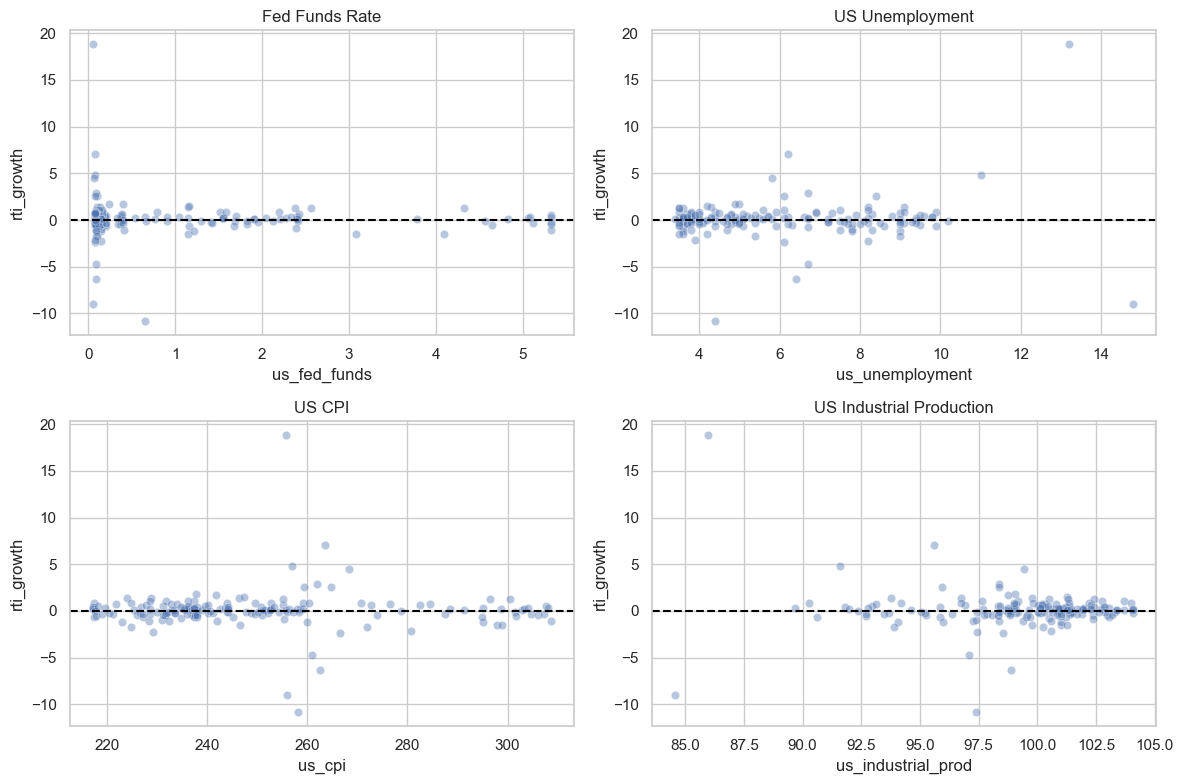

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

pairs = [
    ("us_fed_funds", "Fed Funds Rate"),
    ("us_unemployment", "US Unemployment"),
    ("us_cpi", "US CPI"),
    ("us_industrial_prod", "US Industrial Production"),
]

for ax, (var, title) in zip(axes.flatten(), pairs):
    sns.scatterplot(
        data=ea7,
        x=var,
        y="rti_growth",
        alpha=0.4,
        ax=ax
    )
    ax.axhline(0, color="black", linestyle="--")
    ax.set_title(title)

plt.tight_layout()
plt.show()

## Static Spillover Patterns

- Higher interest rates associate with lower retail growth
- Strong US production aligns with stronger EA7 retail activity
- Unemployment shows asymmetric effects during crises

Global conditions matter, but effects are non-linear.

In [7]:
for k in [3, 6]:
    for var, _ in variables:
        ea7[f"{var}_lead_{k}"] = ea7[var].shift(k)

In [8]:
results = {}

for var, _ in variables:
    corr = (
        ea7[[f"{var}_lead_3", "rti_growth"]]
        .dropna()
        .corr()
        .iloc[0,1]
    )
    results[var] = corr

pd.Series(results).sort_values()

us_fed_funds         -0.015019
us_unemployment      -0.013454
us_industrial_prod   -0.013329
us_cpi               -0.003128
dtype: float64

## Spillover Timing

- US interest rates lead EA7 retail downturns
- Industrial production leads retail recoveries
- Inflation effects are weaker and indirect

Spillovers operate with delays rather than instantly.

In [9]:
X = ea7[[
    "us_fed_funds_lead_3",
    "us_unemployment_lead_3",
    "us_industrial_prod_lead_3"
]].dropna()

y = ea7.loc[X.index, "rti_growth"]

X_mat = np.column_stack([np.ones(len(X)), X])
beta = np.linalg.lstsq(X_mat, y, rcond=None)[0]

pd.Series(
    beta,
    index=["const"] + list(X.columns)
)

const                        7.922042
us_fed_funds_lead_3         -0.089059
us_unemployment_lead_3      -0.135960
us_industrial_prod_lead_3   -0.070021
dtype: float64

## Multivariate Evidence

- Fed Funds Rate has a negative effect
- Industrial production has a positive effect
- Unemployment captures crisis-driven stress

Global financial variables jointly explain retail fluctuations.

## Economic Mechanisms

Transmission channels:
- Monetary tightening → credit constraints
- Global slowdowns → export and income effects
- Financial uncertainty → precautionary saving

Retail demand is globally interconnected.

## Key Takeaways

- Global financial conditions spill into EA7 retail activity
- Effects operate with short lags
- Monetary policy is a key transmission channel

## Link to Next Notebook
➡️ **Notebook 06 — Shocks and Structural Breaks**
We next identify crisis regimes and structural changes in retail dynamics.